In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!mv /content/drive/My\ Drive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:01<00:00, 23.9MB/s]
100% 2.70G/2.70G [02:01<00:00, 23.9MB/s]


In [4]:
!unzip new-plant-diseases-dataset.zip -d /content/lid


Streaming output truncated to the last 5000 lines.
  inflating: /content/lid/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/lid/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/lid/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/lid/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/lid/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270

In [5]:
import os
data_dir = "/content/lid/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
train_diseases = os.listdir(train_dir)
valid_diseases = os.listdir(valid_dir)


In [6]:
def u_plants_num_disease(diseases):
    plants = []
    NumberOfDiseases = 0
    for plant in diseases:
        plant_name, disease = plant.split('___')
        if plant_name not in plants:
            plants.append(plant_name)
        if disease != 'healthy':
            NumberOfDiseases += 1
    return plants,NumberOfDiseases

t_plants,t_NumberOfDiseases = u_plants_num_disease(train_diseases)
v_plants,v_NumberOfDiseases = u_plants_num_disease(valid_diseases)

print("---TRAINING DATASET---\nNUMBER OF UNIQUE PLANTS :",len(t_plants))
print("UNIQUE PLANTS : ")
for t in t_plants:
    print(t)
print("NUMBER OF DISEASES : ",t_NumberOfDiseases)

print("\n---VALIDATION DATASET---\nNUMBER OF UNIQUE PLANTS :",len(v_plants))
print("UNIQUE PLANTS : ")
for v in v_plants:
    print(v)
print("NUMBER OF DISEASES : ",v_NumberOfDiseases)


---TRAINING DATASET---
NUMBER OF UNIQUE PLANTS : 14
UNIQUE PLANTS : 
Tomato
Potato
Apple
Strawberry
Cherry_(including_sour)
Corn_(maize)
Blueberry
Grape
Soybean
Peach
Orange
Pepper,_bell
Squash
Raspberry
NUMBER OF DISEASES :  26

---VALIDATION DATASET---
NUMBER OF UNIQUE PLANTS : 14
UNIQUE PLANTS : 
Tomato
Potato
Apple
Strawberry
Cherry_(including_sour)
Corn_(maize)
Blueberry
Grape
Soybean
Peach
Orange
Pepper,_bell
Squash
Raspberry
NUMBER OF DISEASES :  26


In [7]:
import pandas as pd
t_nums = {}
for disease in train_diseases:
    t_nums[disease] = len(os.listdir(train_dir + '/' + disease))
t_img_per_class = pd.DataFrame(list(t_nums.items()), columns=["T_CLASSES", "T_NUMBER OF IMAGES"])
print("---TRAINING DATASET---")
t_img_per_class


---TRAINING DATASET---


,T_CLASSES,T_NUMBER OF IMAGES
0,Tomato___Early_blight,1920
1,Potato___healthy,1824
2,Apple___Cedar_apple_rust,1760
3,Strawberry___healthy,1824
4,Cherry_(including_sour)___healthy,1826
5,Potato___Early_blight,1939
6,Corn_(maize)___Common_rust_,1907
7,Blueberry___healthy,1816
8,Tomato___Tomato_mosaic_virus,1790
9,Tomato___Bacterial_spot,1702


In [8]:

v_nums = {}
for disease in valid_diseases:
    v_nums[disease] = len(os.listdir(valid_dir + '/' + disease))
v_img_per_class = pd.DataFrame(list(v_nums.items()), columns=["V_CLASSES", "V_NUMBER OF IMAGES"])
print("---VALIDATION DATASET---")
v_img_per_class

---VALIDATION DATASET---


,V_CLASSES,V_NUMBER OF IMAGES
0,Tomato___Early_blight,480
1,Potato___healthy,456
2,Apple___Cedar_apple_rust,440
3,Strawberry___healthy,456
4,Cherry_(including_sour)___healthy,456
5,Potato___Early_blight,485
6,Corn_(maize)___Common_rust_,477
7,Blueberry___healthy,454
8,Tomato___Tomato_mosaic_virus,448
9,Tomato___Bacterial_spot,425


Text(0, 0.5, 'NUMBER OF IMAGES')

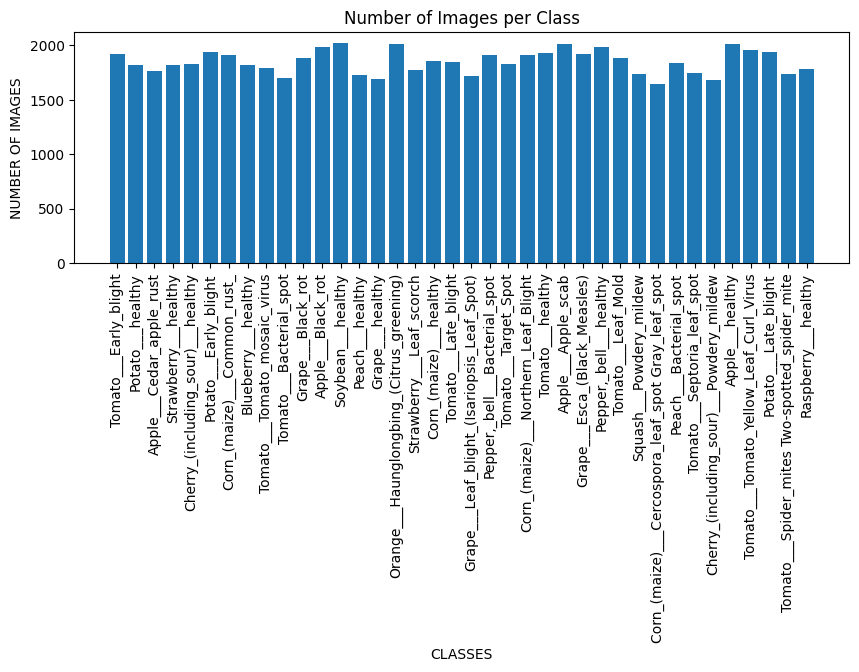

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.title('NUMBER OF IMAGES PER CLASS FOR TRAINING DATASET')
plt.bar(t_img_per_class["T_CLASSES"],t_img_per_class["T_NUMBER OF IMAGES"])
plt.title('Number of Images per Class')
plt.xlabel('CLASSES')
plt.xticks(rotation=90)
plt.ylabel('NUMBER OF IMAGES')


Text(0, 0.5, 'NUMBER OF IMAGES')

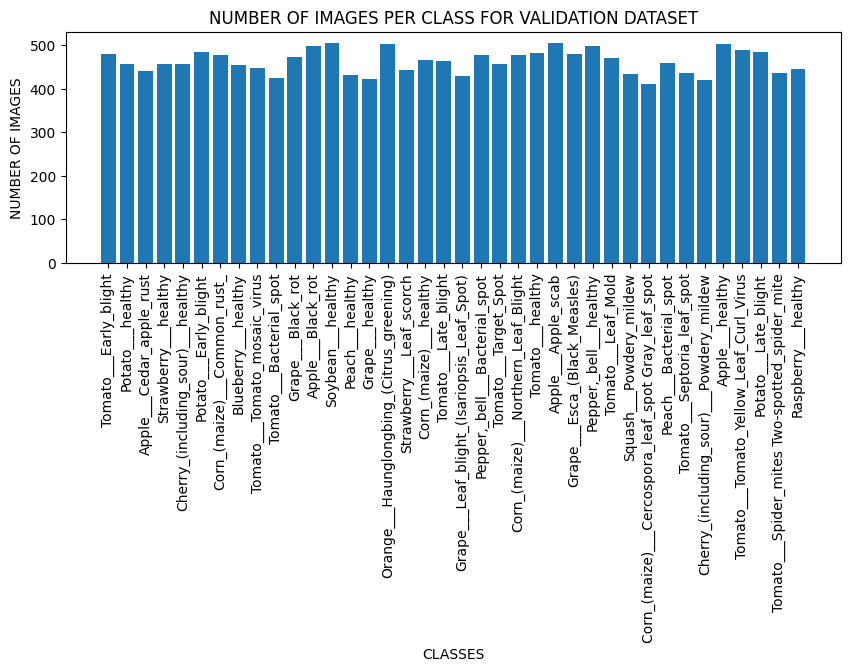

In [10]:
plt.figure(figsize=(10,3))
plt.bar(v_img_per_class["V_CLASSES"],v_img_per_class["V_NUMBER OF IMAGES"])
plt.title('NUMBER OF IMAGES PER CLASS FOR VALIDATION DATASET')
plt.xlabel('CLASSES')
plt.xticks(rotation=90)
plt.ylabel("NUMBER OF IMAGES")


In [11]:
t_img_per_class['T_CLASSIFICATION'] = t_img_per_class['T_CLASSES'].apply(lambda x: 'HEALTHY' if x.endswith('healthy') else 'DISEASED')


In [12]:
v_img_per_class['V_CLASSIFICATION'] = v_img_per_class['V_CLASSES'].apply(lambda x: 'HEALTHY' if x.endswith('healthy') else 'DISEASED')



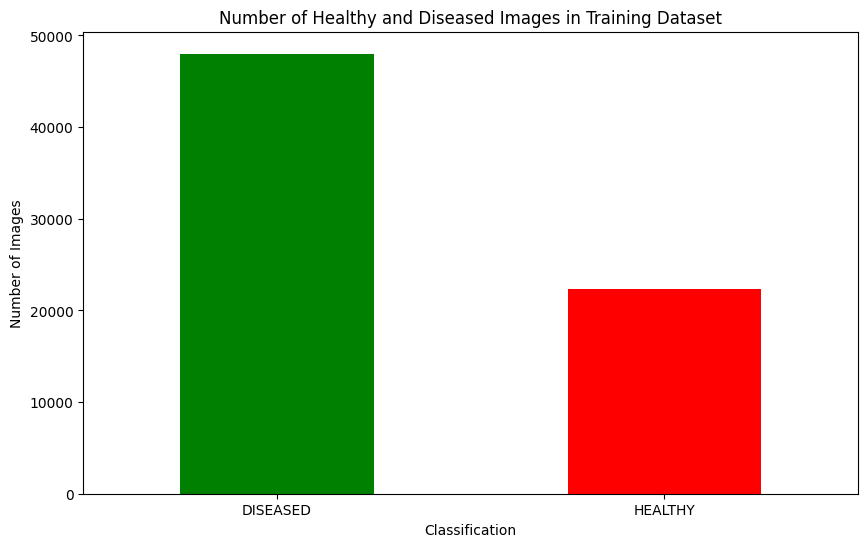

In [13]:
classification_totals = t_img_per_class.groupby('T_CLASSIFICATION')['T_NUMBER OF IMAGES'].sum()
plt.figure(figsize=(10, 6))
classification_totals.plot(kind='bar', color=['green', 'red'])
plt.title('Number of Healthy and Diseased Images in Training Dataset')
plt.xlabel('Classification')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.show()

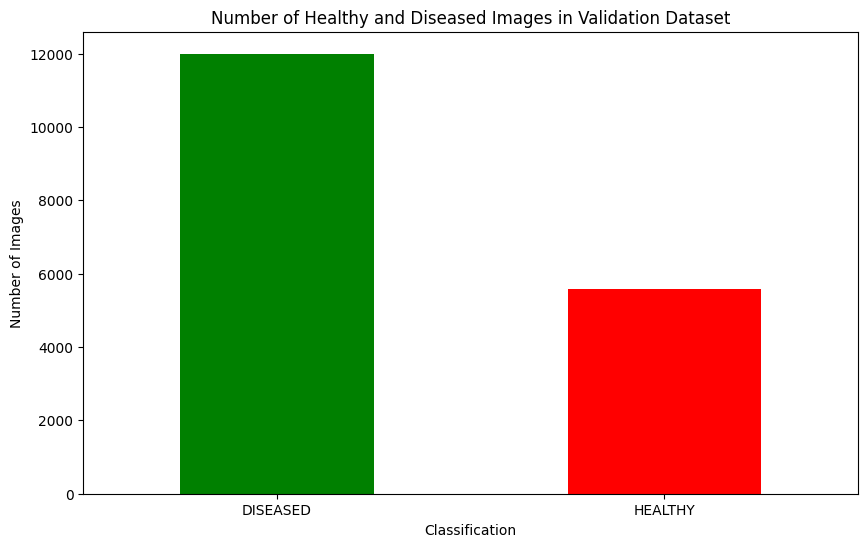

In [14]:
classification_totals = v_img_per_class.groupby('V_CLASSIFICATION')['V_NUMBER OF IMAGES'].sum()
plt.figure(figsize=(10, 6))
classification_totals.plot(kind='bar', color=['green', 'red'])
plt.title('Number of Healthy and Diseased Images in Validation Dataset')
plt.xlabel('Classification')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.show()

In [15]:
def create_dataframe_from_directory(directory):
    data = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(label_path, file_name)
                    data.append([file_path, label])
    df = pd.DataFrame(data, columns=['IMAGES', 'CLASSES'])
    return df


In [16]:
train_df = create_dataframe_from_directory(train_dir)
print("---TRAINING DATASET--")
train_df.head()



---TRAINING DATASET--


,IMAGES,CLASSES
0,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
1,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
2,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
3,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
4,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight


In [17]:
valid_df = create_dataframe_from_directory(valid_dir)
print("---VALIDATION DATASET--")
valid_df.head()

---VALIDATION DATASET--


,IMAGES,CLASSES
0,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
1,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
2,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
3,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight
4,/content/lid/new plant diseases dataset(augmen...,Tomato___Early_blight


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical'
)

valid_ds = image_dataset_from_directory(
    valid_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical'
)


t_class_names = train_ds.class_names
for index, name in enumerate(t_class_names):
    print(f"{index}: {name}")

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
0: Apple___Apple_scab
1: Apple___Black_rot
2: Apple___Cedar_apple_rust
3: Apple___healthy
4: Blueberry___healthy
5: Cherry_(including_sour)___Powdery_mildew
6: Cherry_(including_sour)___healthy
7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8: Corn_(maize)___Common_rust_
9: Corn_(maize)___Northern_Leaf_Blight
10: Corn_(maize)___healthy
11: Grape___Black_rot
12: Grape___Esca_(Black_Measles)
13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14: Grape___healthy
15: Orange___Haunglongbing_(Citrus_greening)
16: Peach___Bacterial_spot
17: Peach___healthy
18: Pepper,_bell___Bacterial_spot
19: Pepper,_bell___healthy
20: Potato___Early_blight
21: Potato___Late_blight
22: Potato___healthy
23: Raspberry___healthy
24: Soybean___healthy
25: Squash___Powdery_mildew
26: Strawberry___Leaf_scorch
27: Strawberry___healthy
28: Tomato___Bacterial_spot
29: Tomato___Early_blight
30: Tomato___Late_blight
31: Tomato___Le

In [19]:
normalization_layer = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
CNN_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(t_class_names), activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
CNN_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_history = CNN_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 452s 197ms/step - accuracy: 0.4475 - loss: 2.3854 - val_accuracy: 0.8165 - val_loss: 0.6472
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 465s 187ms/step - accuracy: 0.7436 - loss: 0.9657 - val_accuracy: 0.8848 - val_loss: 0.4561
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 460s 196ms/step - accuracy: 0.8375 - loss: 0.5843 - val_accuracy: 0.9267 - val_loss: 0.2822
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 422s 187ms/step - accuracy: 0.8837 - loss: 0.4191 - val_accuracy: 0.9343 - val_loss: 0.2500
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 442s 187ms/step - accuracy: 0.9146 - loss: 0.3050 - val_accuracy: 0.9597 - val_loss: 0.1573
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 410s 187ms/step - accuracy: 0.9309 - loss: 0.2522 - val_accuracy: 0.9552 - val_loss: 0.1952
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 411s 187ms/step - accuracy: 0.9455 - loss: 0.1970 - val_accuracy: 0.9531 - val_loss: 0.2205
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 410s 187ms/step - accuracy: 0.9

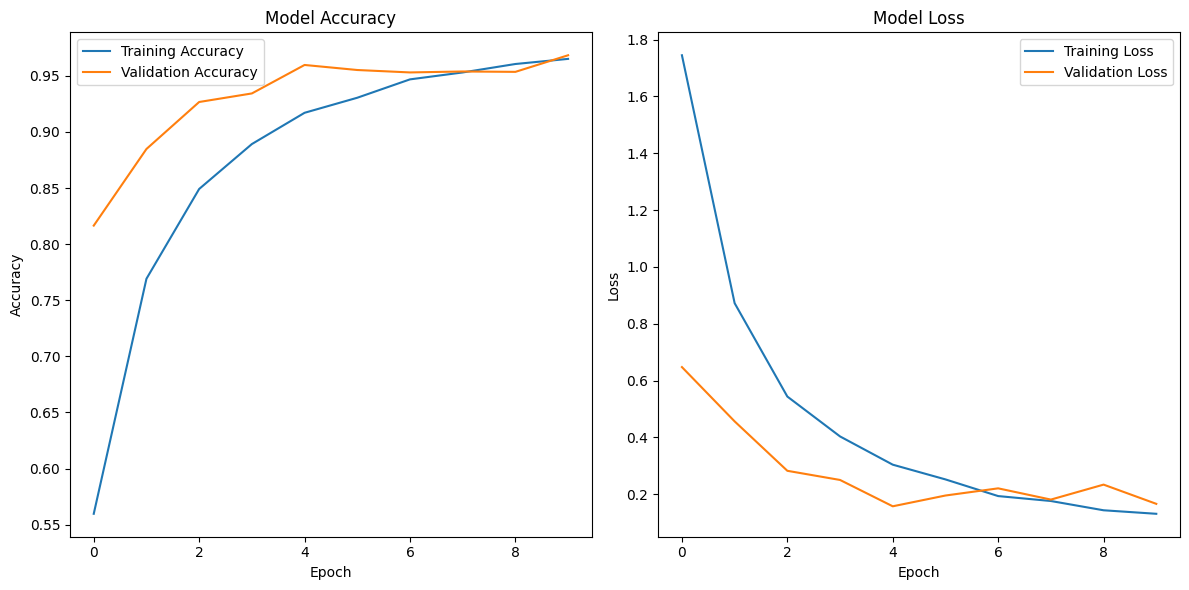

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')


plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(t_class_names), activation='softmax')(x)

model_efficientnet = Model(inputs=base_model.input, outputs=predictions)
model_efficientnet.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [23]:
CNN_model_save_path = '/content/drive/My Drive/Colab Notebooks/CNN_model_for_Classification.h5'
CNN_model.save(CNN_model_save_path)
EfficientNet_model_save_path= '/content/drive/My Drive/Colab Notebooks/EfficientNet_model_for_Classification.h5'
model_efficientnet.save(EfficientNet_model_save_path)

In [24]:
from tensorflow.keras.models import load_model
model_path1 = '/content/drive/My Drive/Colab Notebooks/CNN_model_for_Classification.h5'
model_path2 = '/content/drive/My Drive/Colab Notebooks/EfficientNet_model_for_Classification.h5'
loaded_model1 = load_model(model_path1)
loaded_model2 = load_model(model_path2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


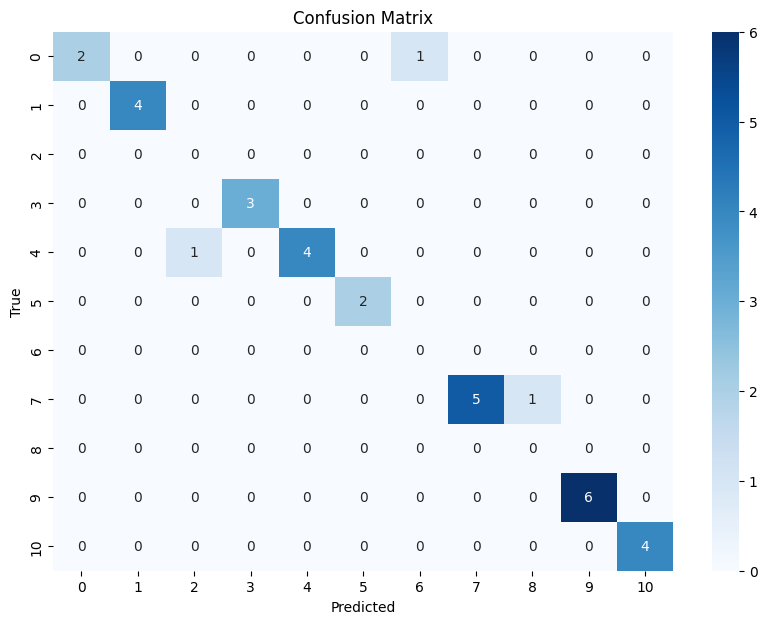

Accuracy: 0.9090909090909091
Precision: 0.7272727272727273
Recall: 0.6636363636363636
F1 Score: 0.6907254361799816


In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnet
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_image_for_efficientnet(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input_efficientnet(img_array)
    return img_array

def preprocess_image_for_cnn(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def evaluate_ensemble_model(test_images, test_labels, cnn_model, efficientnet_model):
    cnn_predictions = []
    efficientnet_predictions = []
    average_predictions = []

    for img_path in test_images:
        img_array_for_cnn = preprocess_image_for_cnn(img_path)
        img_array_for_efficientnet = preprocess_image_for_efficientnet(img_path)

        cnn_pred = cnn_model.predict(img_array_for_cnn)
        efficientnet_pred = efficientnet_model.predict(img_array_for_efficientnet)

        avg_pred = (cnn_pred + efficientnet_pred) / 2
        cnn_predictions.append(np.argmax(cnn_pred, axis=1)[0])
        efficientnet_predictions.append(np.argmax(efficientnet_pred, axis=1)[0])
        average_predictions.append(np.argmax(avg_pred, axis=1)[0])


    average_predictions_array = np.array(average_predictions)
    for idx, pred_class in enumerate(average_predictions_array):
        predicted_class_name = t_class_names[pred_class]
        print(f'Image {idx + 1} - Predicted class: {predicted_class_name}')

    accuracy = accuracy_score(test_labels, average_predictions_array)
    conf_matrix = confusion_matrix(test_labels, average_predictions_array)
    precision = precision_score(test_labels, average_predictions_array, average='macro')
    recall = recall_score(test_labels, average_predictions_array, average='macro')
    f1 = f1_score(test_labels, average_predictions_array, average='macro')

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, precision, recall, f1

base_dir = "/content/lid/test/test/"

filenames = [
    "AppleCedarRust1.JPG",
    "AppleCedarRust2.JPG",
    "AppleCedarRust3.JPG",
    "AppleCedarRust4.JPG",
    "AppleScab1.JPG",
    "AppleScab2.JPG",
    "AppleScab3.JPG",
    "CornCommonRust1.JPG",
    "CornCommonRust2.JPG",
    "CornCommonRust3.JPG",
    "PotatoEarlyBlight1.JPG",
    "PotatoEarlyBlight2.JPG",
    "PotatoEarlyBlight3.JPG",
    "PotatoEarlyBlight4.JPG",
    "PotatoEarlyBlight5.JPG",
    "PotatoHealthy1.JPG",
    "PotatoHealthy2.JPG",
    "TomatoEarlyBlight1.JPG",
    "TomatoEarlyBlight2.JPG",
    "TomatoEarlyBlight3.JPG",
    "TomatoEarlyBlight4.JPG",
    "TomatoEarlyBlight5.JPG",
    "TomatoEarlyBlight6.JPG",
    "TomatoHealthy1.JPG",
    "TomatoHealthy2.JPG",
    "TomatoHealthy3.JPG",
    "TomatoHealthy4.JPG",
    "TomatoYellowCurlVirus1.JPG",
    "TomatoYellowCurlVirus2.JPG",
    "TomatoYellowCurlVirus3.JPG",
    "TomatoYellowCurlVirus4.JPG",
    "TomatoYellowCurlVirus5.JPG",
    "TomatoYellowCurlVirus6.JPG"
]

test_images = [base_dir + filename for filename in filenames]
test_labels = [2,2,2,2,0,0,0,8,8,8,20,20,20,20,20,22,22,29,29,29,29,29,29,37,37,37,37,35,35,35,35,35,35]


accuracy, precision, recall, f1 = evaluate_ensemble_model(test_images, test_labels, loaded_model1,loaded_model2)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
